In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importando os pacotes
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import ipaddress as ipa
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
# Abrindo dataset
dataSet = pd.read_csv('/content/drive/MyDrive/TCC/ProcessedDataset.csv')
df = pd.DataFrame(dataSet)
# df.size()

In [ ]:
# Listando Colunas
df.columns.values.tolist()

['Pacotes p/ Segundo', 'Tamanho médio dos pacotes', 'IPs de destino', 'Label']

In [ ]:
# Make 2d arrays of those 3 parameters using label
X = np.array(df[['Pacotes p/ Segundo', 'Tamanho médio dos pacotes', 'IPs de destino']])
y = np.array(df['Label'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
label_mapping = {'ddos': 1, 'Benign': 0}
label_to_number = np.vectorize(lambda x: label_mapping[x])
y = label_to_number(y)
print(y)


[1 1 1 ... 0 0 0]


In [ ]:
import tensorflow as tf

# Split data into train, validation, and test sets

X_temp, X_test, Y_temp, Y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_data=(X_val, Y_val))

# Evaluate the model on the test set
Y_pred = model.predict(X_test)
Y_pred = (Y_pred >= 0.5).astype(int)


Epoch 1/10
111953/111953 [==============================] - 414s 4ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.0433 - val_accuracy: 0.9882
Epoch 2/10
111953/111953 [==============================] - 403s 4ms/step - loss: 0.0349 - accuracy: 0.9895 - val_loss: 0.0325 - val_accuracy: 0.9904
Epoch 3/10
111953/111953 [==============================] - 394s 4ms/step - loss: 0.0312 - accuracy: 0.9903 - val_loss: 0.0294 - val_accuracy: 0.9902
Epoch 4/10
111953/111953 [==============================] - 387s 3ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0258 - val_accuracy: 0.9919
Epoch 5/10
111953/111953 [==============================] - 382s 3ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0247 - val_accuracy: 0.9928
Epoch 6/10
111953/111953 [==============================] - 388s 3ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0309 - val_accuracy: 0.9934
Epoch 7/10
111953/111953 [==============================] - 353s 3ms/step - loss: 0.0269 - accuracy:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1897374
           1       0.99      0.99      0.99   1941015

    accuracy                           0.99   3838389
   macro avg       0.99      0.99      0.99   3838389
weighted avg       0.99      0.99      0.99   3838389



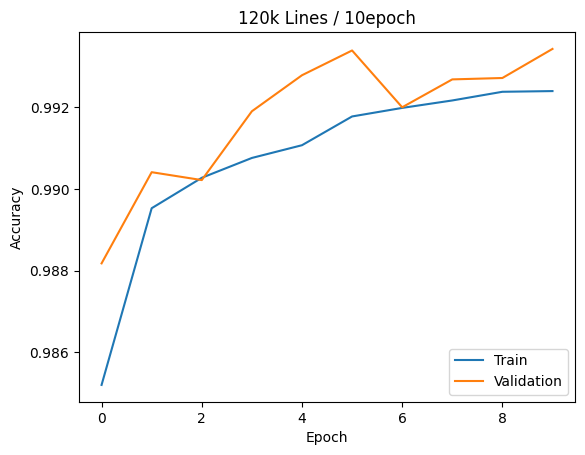

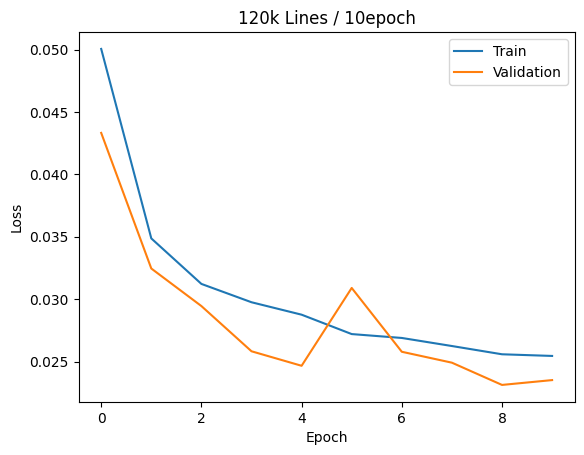

In [ ]:
report = classification_report(Y_test, Y_pred)
print(report)

# Make a graph for visualization of the model's accuracy and loss

# Accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('120k Lines / 10epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('120k Lines / 10epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
